# PARTE 22: COMBINACIÓN DE DATASETS

## PARTE 22.1: PREPARACIÓN DEL DATASET

In [33]:
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/22_1_COMBINACION_BALON_ORO.xlsx"
DATASET = pd.read_excel(RUTA,"Feuil1")

DATASET_GANADORES = DATASET[DATASET["id"].notnull()].reset_index()
DATASET_GANADORES = DATASET_GANADORES.drop(["index"] , axis = 1)
DATASET_GANADORES["id"] = list(range(len(DATASET_GANADORES)))
DATASET_GANADORES.shape

(34, 18)

In [22]:
#CONJUNTOS QUE COMPARTEN ALGUNAS FILAS
DATASET_CONJUNTO_1 = DATASET_GANADORES.iloc[:25 , :6].copy().reset_index()
DATASET_CONJUNTO_1 = DATASET_CONJUNTO_1.drop(["index"] , axis = 1)

DATASET_CONJUNTO_2 = DATASET_GANADORES.iloc[15: , :6].copy().reset_index()
DATASET_CONJUNTO_2 = DATASET_CONJUNTO_2.drop(["index"] , axis = 1)

In [23]:
DATASET_CONJUNTO_1.head()

,id,years,player,Age,Team,Poste
0,0,1990,Lothar Matthäus,29,Inter Milan,Defense
1,1,1990,Salvatore Schillaci,26,Juventus,Attack
2,2,1990,Andreas Brehme\n,30,Inter Milan,Defense
3,3,1991,Jean-Pierre Papin,28,Marseille,Attack
4,4,1991,Darko Pančev\n,26,ER Belegrade,Attack


In [24]:
DATASET_CONJUNTO_2.head()

,id,years,player,Age,Team,Poste
0,15,2001,Michael Owen,22,Liverpool,Attack
1,16,2002,Ronaldo,26,Inter Milan,Attack
2,17,2003,Pavel Nedvěd,31,Juventus,Milieu
3,18,2004,Andriy Shevchenko,28,Ac Milan,Attack
4,19,2005,Ronaldinho,25,FC Barcelone,Milieu


## PARTE 22.2: TIPO DE COMBINACIÓN "INNER"

* RECOMENDACIÓN 1: Verifica que la llave sea única
* RECOMENDACIÓN 2: Solo te mostrará las filas que comparten el mismo ID entre los DATASET
* RECOMENDACIÓN 3: Las columnas que te mostrará son las de ambos DATASET, las del primero indicadas como "_x" y las del segundo indicadas como "_y"

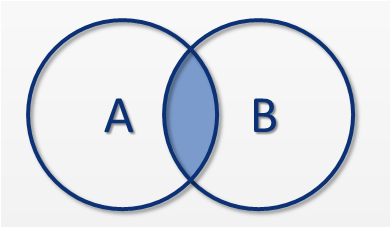

In [1]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/INNER.png")

In [25]:
DATASET_INNER = pd.merge(left = DATASET_CONJUNTO_1,
                         right = DATASET_CONJUNTO_2,
                         how = "inner",
                         left_on = "id",
                         right_on = "id")

In [26]:
DATASET_INNER

,id,years_x,player_x,Age_x,Team_x,Poste_x,years_y,player_y,Age_y,Team_y,Poste_y
0,15,2001,Michael Owen,22,Liverpool,Attack,2001,Michael Owen,22,Liverpool,Attack
1,16,2002,Ronaldo,26,Inter Milan,Attack,2002,Ronaldo,26,Inter Milan,Attack
2,17,2003,Pavel Nedvěd,31,Juventus,Milieu,2003,Pavel Nedvěd,31,Juventus,Milieu
3,18,2004,Andriy Shevchenko,28,Ac Milan,Attack,2004,Andriy Shevchenko,28,Ac Milan,Attack
4,19,2005,Ronaldinho,25,FC Barcelone,Milieu,2005,Ronaldinho,25,FC Barcelone,Milieu
5,20,2006,Fabio Cannavaro,33,Juventus,Defense,2006,Fabio Cannavaro,33,Juventus,Defense
6,21,2007,Kaká,25,Ac Milan,Milieu,2007,Kaká,25,Ac Milan,Milieu
7,22,2008,Cristiano Ronaldo,23,Manchester United,Attack,2008,Cristiano Ronaldo,23,Manchester United,Attack
8,23,2009,Lionel Messi,22,FC Barcelone,Attack,2009,Lionel Messi,22,FC Barcelone,Attack
9,24,2010,Lionel Messi,23,FC Barcelone,Attack,2010,Lionel Messi,23,FC Barcelone,Attack


## PARTE 22.3: TIPO DE COMBINACIÓN "RIGHT"

* RECOMENDACIÓN 1: Verifica que la llave sea única
* RECOMENDACIÓN 2: Te mostrará las filas que comparten el mismo ID entre los DATASET y también las que solo pertenecen al DATASET de la derecha
* RECOMENDACIÓN 3: Las columnas que te mostrará son las de ambos DATASET, las del primero indicadas como "_x" y las del segundo indicadas como "_y"
* RECOMENDACIÓN 4: La información del SUBSET del DATASET de la derecha que no comparte información con el DATASET de la izquierda, mostrará "VACÍO" para las columnas "_x"

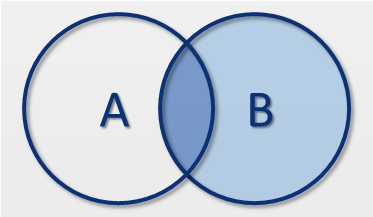

In [2]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/RIGHT.png")

In [27]:
DATASET_RIGHT = pd.merge(left = DATASET_CONJUNTO_1,
                         right = DATASET_CONJUNTO_2,
                         how = "right",
                         left_on = "id",
                         right_on = "id")

In [28]:
DATASET_RIGHT

,id,years_x,player_x,Age_x,Team_x,Poste_x,years_y,player_y,Age_y,Team_y,Poste_y
0,15,2001.0,Michael Owen,22.0,Liverpool,Attack,2001,Michael Owen,22,Liverpool,Attack
1,16,2002.0,Ronaldo,26.0,Inter Milan,Attack,2002,Ronaldo,26,Inter Milan,Attack
2,17,2003.0,Pavel Nedvěd,31.0,Juventus,Milieu,2003,Pavel Nedvěd,31,Juventus,Milieu
3,18,2004.0,Andriy Shevchenko,28.0,Ac Milan,Attack,2004,Andriy Shevchenko,28,Ac Milan,Attack
4,19,2005.0,Ronaldinho,25.0,FC Barcelone,Milieu,2005,Ronaldinho,25,FC Barcelone,Milieu
5,20,2006.0,Fabio Cannavaro,33.0,Juventus,Defense,2006,Fabio Cannavaro,33,Juventus,Defense
6,21,2007.0,Kaká,25.0,Ac Milan,Milieu,2007,Kaká,25,Ac Milan,Milieu
7,22,2008.0,Cristiano Ronaldo,23.0,Manchester United,Attack,2008,Cristiano Ronaldo,23,Manchester United,Attack
8,23,2009.0,Lionel Messi,22.0,FC Barcelone,Attack,2009,Lionel Messi,22,FC Barcelone,Attack
9,24,2010.0,Lionel Messi,23.0,FC Barcelone,Attack,2010,Lionel Messi,23,FC Barcelone,Attack


## PARTE 22.4: TIPO DE COMBINACIÓN "LEFT"

* RECOMENDACIÓN 1: Verifica que la llave sea única
* RECOMENDACIÓN 2: Te mostrará las filas que comparten el mismo ID entre los DATASET y también las que solo pertenecen al DATASET de la izquierda
* RECOMENDACIÓN 3: Las columnas que te mostrará son las de ambos DATASET, las del primero indicadas como "_x" y las del segundo indicadas como "_y"
* RECOMENDACIÓN 4: La información del SUBSET del DATASET de la izquierda que no comparte información con el DATASET de la derecha, mostrará "VACÍO" para las columnas "_y"

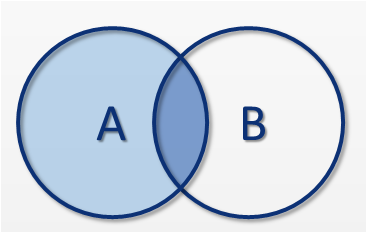

In [3]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/LEFT.png")

In [29]:
DATASET_LEFT = pd.merge(left = DATASET_CONJUNTO_1,
                        right = DATASET_CONJUNTO_2,
                        how = "left",
                        left_on = "id",
                        right_on = "id")

In [30]:
DATASET_LEFT

,id,years_x,player_x,Age_x,Team_x,Poste_x,years_y,player_y,Age_y,Team_y,Poste_y
0,0,1990,Lothar Matthäus,29,Inter Milan,Defense,NaN,NaN,NaN,NaN,NaN
1,1,1990,Salvatore Schillaci,26,Juventus,Attack,NaN,NaN,NaN,NaN,NaN
2,2,1990,Andreas Brehme\n,30,Inter Milan,Defense,NaN,NaN,NaN,NaN,NaN
3,3,1991,Jean-Pierre Papin,28,Marseille,Attack,NaN,NaN,NaN,NaN,NaN
4,4,1991,Darko Pančev\n,26,ER Belegrade,Attack,NaN,NaN,NaN,NaN,NaN
5,5,1991,Lothar Matthäus,30,Inter Milan,defense,NaN,NaN,NaN,NaN,NaN
6,6,1992,Marco van Basten,28,Ac Milan,Attack,NaN,NaN,NaN,NaN,NaN
7,7,1993,Roberto Baggio,26,Juventus,Milieu,NaN,NaN,NaN,NaN,NaN
8,8,1994,Hristo Stoichkov,28,FC Barcelone,Attack,NaN,NaN,NaN,NaN,NaN
9,9,1995,George Weah,29,Paris SG,Attack,NaN,NaN,NaN,NaN,NaN


## PARTE 22.5: TIPO DE COMBINACIÓN "OUTER"

* RECOMENDACIÓN 1: Verifica que la llave sea única
* RECOMENDACIÓN 2: Te mostrará las filas que comparten el mismo ID entre los DATASET, las que solo pertenecen al DATASET de la izquierda y también las que solo pertenecen al DATASET de la derecha
* RECOMENDACIÓN 3: Las columnas que te mostrará son las de ambos DATASET, las del primero indicadas como "_x" y las del segundo indicadas como "_y"
* RECOMENDACIÓN 4: La información del SUBSET del DATASET de la izquierda que no comparte información con el DATASET de la derecha, mostrará "VACÍO" para las columnas "_y"
* RECOMENDACIÓN 5: La información del SUBSET del DATASET de la derecha que no comparte información con el DATASET de la izquierda, mostrará "VACÍO" para las columnas "_x"

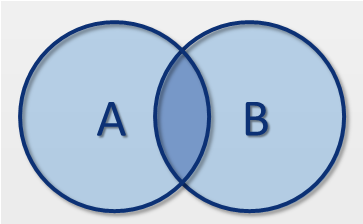

In [4]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/OUTER.png")

In [31]:
DATASET_OUTER = pd.merge(left = DATASET_CONJUNTO_1,
                         right = DATASET_CONJUNTO_2,
                         how = "outer",
                         left_on = "id",
                         right_on = "id")

In [32]:
DATASET_OUTER

,id,years_x,player_x,Age_x,Team_x,Poste_x,years_y,player_y,Age_y,Team_y,Poste_y
0,0,1990.0,Lothar Matthäus,29.0,Inter Milan,Defense,NaN,NaN,NaN,NaN,NaN
1,1,1990.0,Salvatore Schillaci,26.0,Juventus,Attack,NaN,NaN,NaN,NaN,NaN
2,2,1990.0,Andreas Brehme\n,30.0,Inter Milan,Defense,NaN,NaN,NaN,NaN,NaN
3,3,1991.0,Jean-Pierre Papin,28.0,Marseille,Attack,NaN,NaN,NaN,NaN,NaN
4,4,1991.0,Darko Pančev\n,26.0,ER Belegrade,Attack,NaN,NaN,NaN,NaN,NaN
5,5,1991.0,Lothar Matthäus,30.0,Inter Milan,defense,NaN,NaN,NaN,NaN,NaN
6,6,1992.0,Marco van Basten,28.0,Ac Milan,Attack,NaN,NaN,NaN,NaN,NaN
7,7,1993.0,Roberto Baggio,26.0,Juventus,Milieu,NaN,NaN,NaN,NaN,NaN
8,8,1994.0,Hristo Stoichkov,28.0,FC Barcelone,Attack,NaN,NaN,NaN,NaN,NaN
9,9,1995.0,George Weah,29.0,Paris SG,Attack,NaN,NaN,NaN,NaN,NaN


In [35]:
DATASET_GANADORES

,id,years,player,Age,Team,Poste,Match played,minute Played,titularisation,Goal,PD,Efficacité,Victoire,yellow card,red card,Palmares,Recompense SOLO,classement
0,0,1990,Lothar Matthäus,29,Inter Milan,Defense,42,3722,100,19,0,196.0,55,1,0,2,2,1
1,1,1990,Salvatore Schillaci,26,Juventus,Attack,53,4447,96,26,0,171.0,60,0,1,2,3,2
2,2,1990,Andreas Brehme\n,30,Inter Milan,Defense,51,4530,98,9,3,503.0,59,3,0,1,1,3
3,3,1991,Jean-Pierre Papin,28,Marseille,Attack,55,4993,100,42,1,119.0,64,2,0,1,2,1
4,4,1991,Darko Pančev\n,26,ER Belegrade,Attack,16,1371,100,15,0,91.0,63,1,0,2,1,2
5,5,1991,Lothar Matthäus,30,Inter Milan,defense,53,4629,100,27,0,171.0,57,0,0,1,1,3
6,6,1992,Marco van Basten,28,Ac Milan,Attack,47,3943,100,30,0,131.0,64,3,1,2,2,1
7,7,1993,Roberto Baggio,26,Juventus,Milieu,49,4081,96,35,0,117.0,55,2,0,1,1,1
8,8,1994,Hristo Stoichkov,28,FC Barcelone,Attack,59,4476,93,32,0,140.0,61,1,2,2,3,1
9,9,1995,George Weah,29,Paris SG,Attack,60,4786,88,19,1,252.0,62,0,0,2,2,1


## PARTE 22.6: ESCENARIO ADICIONAL

In [36]:
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/22_1_COMBINACION_BALON_ORO.xlsx"
DATASET = pd.read_excel(RUTA,"Feuil1")

DATASET_GANADORES = DATASET[DATASET["id"].notnull()].reset_index()
DATASET_GANADORES = DATASET_GANADORES.drop(["index"] , axis = 1)
DATASET_GANADORES["id"] = list(range(len(DATASET_GANADORES)))
DATASET_GANADORES

,id,years,player,Age,Team,Poste,Match played,minute Played,titularisation,Goal,PD,Efficacité,Victoire,yellow card,red card,Palmares,Recompense SOLO,classement
0,0,1990,Lothar Matthäus,29,Inter Milan,Defense,42,3722,100,19,0,196.0,55,1,0,2,2,1
1,1,1990,Salvatore Schillaci,26,Juventus,Attack,53,4447,96,26,0,171.0,60,0,1,2,3,2
2,2,1990,Andreas Brehme\n,30,Inter Milan,Defense,51,4530,98,9,3,503.0,59,3,0,1,1,3
3,3,1991,Jean-Pierre Papin,28,Marseille,Attack,55,4993,100,42,1,119.0,64,2,0,1,2,1
4,4,1991,Darko Pančev\n,26,ER Belegrade,Attack,16,1371,100,15,0,91.0,63,1,0,2,1,2
5,5,1991,Lothar Matthäus,30,Inter Milan,defense,53,4629,100,27,0,171.0,57,0,0,1,1,3
6,6,1992,Marco van Basten,28,Ac Milan,Attack,47,3943,100,30,0,131.0,64,3,1,2,2,1
7,7,1993,Roberto Baggio,26,Juventus,Milieu,49,4081,96,35,0,117.0,55,2,0,1,1,1
8,8,1994,Hristo Stoichkov,28,FC Barcelone,Attack,59,4476,93,32,0,140.0,61,1,2,2,3,1
9,9,1995,George Weah,29,Paris SG,Attack,60,4786,88,19,1,252.0,62,0,0,2,2,1


In [42]:
DATASET_CONJUNTO_1 = DATASET_GANADORES[["id","years","player"]].copy()
DATASET_CONJUNTO_2 = DATASET_GANADORES[["id","Age","Team"]].copy()

In [43]:
DATASET_CONJUNTO_1

,id,years,player
0,0,1990,Lothar Matthäus
1,1,1990,Salvatore Schillaci
2,2,1990,Andreas Brehme\n
3,3,1991,Jean-Pierre Papin
4,4,1991,Darko Pančev\n
5,5,1991,Lothar Matthäus
6,6,1992,Marco van Basten
7,7,1993,Roberto Baggio
8,8,1994,Hristo Stoichkov
9,9,1995,George Weah


In [44]:
DATASET_CONJUNTO_2

,id,Age,Team
0,0,29,Inter Milan
1,1,26,Juventus
2,2,30,Inter Milan
3,3,28,Marseille
4,4,26,ER Belegrade
5,5,30,Inter Milan
6,6,28,Ac Milan
7,7,26,Juventus
8,8,28,FC Barcelone
9,9,29,Paris SG


In [45]:
DATASET_CONSOLIDADO = pd.merge(left = DATASET_CONJUNTO_1,
                               right = DATASET_CONJUNTO_2,
                               how = "inner",
                               left_on = "id",
                               right_on = "id")

In [46]:
DATASET_CONSOLIDADO

,id,years,player,Age,Team
0,0,1990,Lothar Matthäus,29,Inter Milan
1,1,1990,Salvatore Schillaci,26,Juventus
2,2,1990,Andreas Brehme\n,30,Inter Milan
3,3,1991,Jean-Pierre Papin,28,Marseille
4,4,1991,Darko Pančev\n,26,ER Belegrade
5,5,1991,Lothar Matthäus,30,Inter Milan
6,6,1992,Marco van Basten,28,Ac Milan
7,7,1993,Roberto Baggio,26,Juventus
8,8,1994,Hristo Stoichkov,28,FC Barcelone
9,9,1995,George Weah,29,Paris SG
